In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import time

In [6]:
myfloat = np.float64

def myplot(function, epsilon):
    
    x = np.arange(0.1, 1.9, 0.01)
    y = [function(i, epsilon) for i in x]
    
    plt.plot(x,y)

In [7]:
def naive_sum(z, epsilon):

    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(1/(epsilon*0.9))
    
    result = myfloat(0)
    
    for k in np.arange(1, n):
        result += 1/(k*k - k - z)
    
    return result

In [8]:
def faster_sum(z, epsilon):
       
    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(1/(epsilon*0.9)) #TODO change n(epsilon)
    
    result = myfloat(np.pi*np.pi/6)
    
    for k in np.arange(1, n):
        
        result +=  ((1/(k*k-k-z))*(k*k)-1)/(k*k)
        
    return result

In [9]:
@nb.jit(nopython = True)
def faster_sum_numba(z, epsilon):
       
    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(1/(epsilon*0.9)) #TODO change n(epsilon)
    
    result = myfloat(np.pi*np.pi/6)
    
    for k in np.arange(1, n):
        
        result = result + ((1/(k*k-k-z))*(k*k)-1)/(k*k)
        
    return result

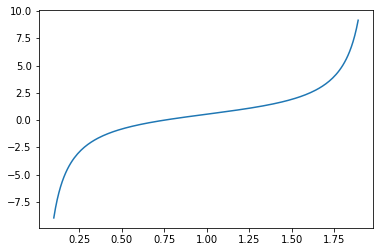

In [18]:
myplot(faster_sum_numba,10**-6)

In [24]:
# measure speed up from using numba

# parameters
myz = 1
myepsilon = 10**-6

# measure the vanilla python + numpy
start = time.time()
vr = faster_sum(myz,myepsilon)
end = time.time()
vt = end-start

# measure jit compiled function
start = time.time()
nr = faster_sum_numba(myz,myepsilon)
end = time.time()
nt = end-start

print('vanilla python + numpy time:',vt)
print('numba time:',nt)
print('\tspeedup:', vt/nt)
print('')
print('vanilla result', vr)
print('numba result', nr)
print('\tdifference in results:', vr-nr)

vanilla python + numpy time: 1.3997387886047363
numba time: 0.003229856491088867
	speedup: 433.3749169557836

vanilla result 0.5462506241047935
numba result 0.5462506241047935
	difference in results: 0.0
